# 循环神经网络股票预测初探

## 循环神经网络介绍

当我们对新事物进行思考时,其实并不每次都是从零开始,过往的经验总会给我们一些启
发。对于一段连续的语音、一篇连续的文章,我们可以根据句子的开头去猜测结尾,但传
统的神经网络却很难做到这一点。循环神经网络(Recurrent Neural Networks)正是处理这
一系列问题的专家。RNN 的前身是 1982 年由 John Hopfield 提出的 Hopfield 模型,由于
实现困难外加没有合适的应用领域,一直没有得到学界重视,近年来由于自然语言处理的
需求,RNN 得以深度发展。

## 循环神经网络与传统神经网络区别

循环神经网络与传统神经网络最大的区别就是更适合用于处理时间序列数据，传统的神经网络，前面的样本不会对后面样本的输出造成影响，而在循环神经网络中，先前样本的
输出会成为后面样本的输入之一，这就是的网络具有了“记忆”功能，在处理序列数据上，更有优势。

## Recurrent Neural network

顾名思义,RNN 是包含循环的网络,如图表 1 左侧所示,神经网络的模块正在读取某个
输入 x,并输出一个值 o,循环可以使得信息从当前步传递到下一步。从表面看,这样的
网络结构较难理解,因此将其展开为图表 1 右侧。
对于从序列索引 1 到 T 的时间序列数据,
如果关注 t 时刻附近的网络结构,x t 代表了在序列索引号 t 时刻训练样本的输入,同理x t−1
和x t+1 代表了在序列索引号 t-1 时刻和 t+1 时刻训练样本的输入; h t 代表在 t 时刻模型的隐
藏状态,与 ANN 不同的是,h t 不仅由x t 决定,也受到h t−1 的影响;o t 代表在 t 时刻模型的
输出,o t 只由模型当前的隐藏状态h t 决定;y t 是 t 时刻样本序列的真实值;L t 是 t 时刻模型
的损失函数,通过o t 和y t 计算得出;U、V、W 这三个矩阵是模型的参数,它们在整个模
型中是共享的,
这和传统的 ANN 模型不太一样,同时也体现了 RNN 模型循环反馈的思想。

![title](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

## RNN 使用形式

使用 RNN 时的主要形式有 4 种,如图 所示。
1. Many to many,每一个输入都有相对应的输出,例如给视频的每一帧贴标签;
2. Many to one,整个序列只有一个输出,例如文本的情感分析;
3. One to many,通过一个输入产生一个序列,例如给一张图片加上一串解说词;
4. Many to many,并不一一对应,典型应用是翻译领域。


![RNN](https://karpathy.github.io/assets/rnn/diags.jpeg)

## 长短期记忆网络 Long Short Term Memory LSTM

传统 RNN 模型容易产生梯度消失的问题,难以处理长序列的数据。而造成梯度消失的原
因,本质上是因为隐藏层状态 h t 的计算方式导致梯度被表示为连乘积的形式 ,因此
Hochreater 和 Schmidhuber 在 1997 年提出了长短期记忆网络 LSTM,通过精心设计的隐
藏层神经元缓解了传统 RNN 的梯度消失问题。

LSTM 模型中,每个序列索引位置 t 时刻被向前传播的,除了和 RNN 一样的隐藏状态h t ,
还多了另一个隐藏状态。这个隐藏状态被我们称为细胞状态
C t (Cell State),C t 在 LSTM 中实质上起到了 RNN 中隐层状态h t 的作用。除了细胞状态,
图中还有其他许多结构,这些结构一般称之为门控结构(Gate)。LSTM 模型在每个序列索
引位置 t 的门控结构一般包括遗忘门,输入门和输出门三种。

![LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

我们的模型首先决定丢弃哪些信息，这是通过一个sigmoid层来实现的，也称为遗忘门层（forget gate layer）。接收上一层的输出
以及当前输入，对于胞元状态（Cell State） Ct−1中的每一个数，输出一个0-1之间的数值。1代表完全保留，0代表完全丢弃。例如在一个用来预测下一个单词的
语言模型中，胞元状态可能会需要保留句子主语的阳性/阴性信息进而使用正确的单复数形式。当我们看到了一个新的主语时，我们需要忘掉老的主语。

![forget gate](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png)

接下来我们需要决定的是在胞元状态中存储哪些新的信息。首先，一个sigmoid层，“输入门层”，决定我们更新哪些信息，接下来，一个tanh层生成一个新的
可以增加到当前状态的候选值向量，C~t，然后，我们将这两者组合来对状态进行更新。在我们的语言模型例子中，我们想要添加新主语的gender信息，来代替我们遗忘的旧的主语。

![title](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png)

最终，我们将决定输出的内容。我们的输出基于胞元状态，但是是一个滤波后的版本。首先，我们运行一个sigmoid层来确定我们将要输出胞元状态的哪些部分，然后我们将该状态送入tanh（使得值在-1和1的区间内），并且和sigmoid门的输出相乘，这样我们只会输出我们想要输出的部分。

![title](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png)

GRU 概述
门控循环单元(Gated Recurrent Units)由 Cho 在 2014 年提出,是 LSTM 模型的一类常见
变种。与 LSTM 不同的是, GRU 将遗忘门和输入门合成为单一的更新门。 GRU
将输入门i t 和遗忘门f t 融合成单一的更新门z t ,并且融合了细胞状态C t 和隐藏状态h t 。

![title](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)

GRU 对比 LSTM
Greff 在 2015 年比较了 LSTM 常见的变种,发现它们的学习效果相差无几;GRU 的主要
优势在于其构造简单,相比 LSTM 减少了一个门控结构,少了很多矩阵乘法运算,因此在
训练数据量很大的情况下,GRU 相比 LSTM 能节省很多时间

# 基于LSTM股价预测

实验数据 股票分钟数据

In [16]:
import pandas as pd
df = pd.read_csv('/home/dell/zcy/Fintech/Min_stock_data/2016/000001.SZ.csv',names=['open','high','low','close','volume','money'])

股票开头前几分钟数据展示

In [17]:
df.head()

,open,high,low,close,volume,money
20160104 09:30:00,12.00,12.03,11.99,11.99,690256,8284705.0
20160104 09:31:00,11.99,11.99,11.96,11.97,650744,7798241.0
20160104 09:32:00,11.97,11.99,11.97,11.99,367600,4402249.0
20160104 09:33:00,11.99,11.99,11.98,11.99,312332,3743239.0
20160104 09:34:00,11.99,12.00,11.99,12.00,413989,4967174.0


单变量单步股价预测，用前n天的收盘价，来预测n+1天股票收盘价，本例中n=20 （程序中的look_back参数）

Using TensorFlow backend.
/home/dell/anaconda3/envs/Fintech/lib/python3.5/site-packages/ipykernel/__main__.py:53: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/home/dell/anaconda3/envs/Fintech/lib/python3.5/site-packages/ipykernel/__main__.py:53: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(None, 1))`
/home/dell/anaconda3/envs/Fintech/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
34s - loss: 0.0021
Epoch 2/5
33s - loss: 1.7154e-04
Epoch 3/5
33s - loss: 1.2444e-04
Epoch 4/5
33s - loss: 1.0809e-04
Epoch 5/5
33s - loss: 8.8611e-05


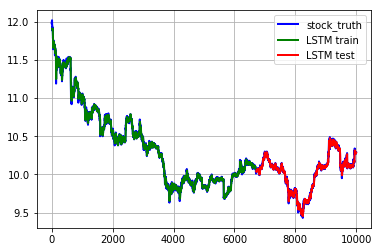

In [1]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import pandas as pd

import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np


def create_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:(i+look_back),0])
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

# df = pd.read_csv('/home/dell/zcy/Fintech/sp500/data_stocks.csv')
# dataset = np.array(df['SP500'].values[0:1000])
# dataset = dataset.astype('float32')


df = pd.read_csv('/home/dell/zcy/Fintech/Min_stock_data/2016/000001.SZ.csv',names=['open','high','low','close','volume','money'])
dataset = df['close'].values[0:10000]
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))

train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

look_back = 20
X_train,y_train = create_dataset(train,look_back)
X_test,y_test = create_dataset(test,look_back)

# reshape for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(32,input_dim=1))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,nb_epoch=5,batch_size=5,verbose=2)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred = scaler.inverse_transform(train_pred)
y_train = np.reshape(y_train,(-1,1))
y_train = scaler.inverse_transform(y_train)
y_test = np.reshape(y_test,(-1,1))
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test)

train_pred_plot = np.empty_like(dataset)
train_pred_plot[:,:] = np.nan
train_pred_plot[look_back:len(train_pred)+look_back,:] = train_pred

test_pred_plot = np.empty_like(dataset)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred)+(look_back*2)+1:len(dataset)-1,:] = test_pred

plt.figure()
plt.plot(scaler.inverse_transform(dataset),color='b',lw=2.0,label='stock_truth')
plt.plot(train_pred_plot,color='g',lw=2.0,label='LSTM train')
plt.plot(test_pred_plot,color='r',lw=2.0,label='LSTM test')
plt.legend(loc=0)
plt.grid(True)
plt.show()